1. Company is collecting data from various sources and the volume of raw data flow is 10GB per day. 
        a. Calculate and visualize the total data volume for three years
        b. Calculate and visualize the daily storage costs for three years for Google big query active logical storage
        c. Calculate and visualize cumulative storage costs for three years for Google big query storage
        d. Assume that raw data is deleted after 3 months and only 2GB of processed data per day is stored. Repeat tasks b and c for this case. 

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno

In [2]:
# input 10, 3 and 0.02 respectively
daily_data_flow = int(input("Daily Data flow value(GB): "))
no_of_year = int(input("Enter Number of Years: "))
data_storage_cost_per_day = float(input("Enter Price of the storage (price/day/gb): "))

In [3]:
no_of_days = list(range(1,(no_of_year * 365 + 1)))
total_cumulative_storage = []
for day in no_of_days:
    total_cumulative_storage.append(round((daily_data_flow * day),2))

daily_total_cost = []
for storage in total_cumulative_storage:
    daily_total_cost.append(round(round(data_storage_cost_per_day * storage),2))

daily_cumulative_cost = []
j=0
for i in range(0,len(daily_total_cost)):
    j+=daily_total_cost[i]
    daily_cumulative_cost.append(j)


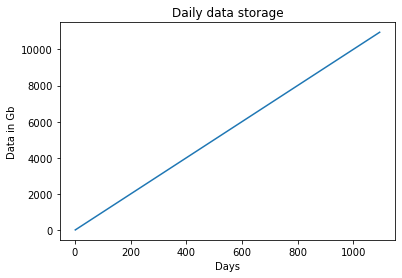

In [4]:
# a. Calculate and visualize the total data volume for three years
plt.plot(no_of_days, total_cumulative_storage)
plt.title("Daily data storage")
plt.xlabel("Days")
plt.ylabel("Data in Gb")
plt.show()

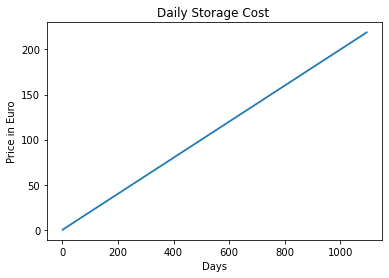

In [5]:
#b. Calculate and visualize the daily storage costs for three years for Google big query active logical storage
plt.plot(no_of_days, daily_total_cost)
plt.title("Daily Storage Cost ")
plt.xlabel("Days")
plt.ylabel("Price in Euro")
plt.show()

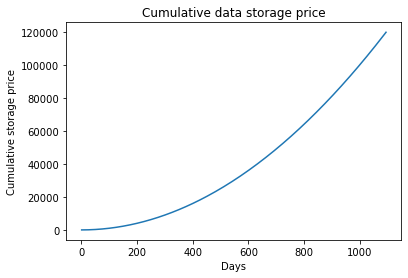

In [6]:
#c. Calculate and visualize cumulative storage costs for three years for Google big query storage
plt.plot(no_of_days, daily_cumulative_cost)
plt.title("Cumulative data storage price")
plt.xlabel("Days")
plt.ylabel("Cumulative storage price")
plt.show()

In [7]:
#d. Assume that raw data is deleted after 3 months and only 2GB of processed data per day is stored. Repeat tasks b and c for this case.
first_90_days = list(range(1,(90 + 1)))
after_90_days = list(range(1,((no_of_year * 365 + 1)-90)))
daily_data_flow_after_90_days = 2
total_cumulative_storage_updated = []
for day in first_90_days:
         total_cumulative_storage_updated.append(round((daily_data_flow * day),2))
for day in after_90_days:
         total_cumulative_storage_updated.append(round((daily_data_flow_after_90_days * day),2))

daily_total_cost_updated = []
for storage in total_cumulative_storage_updated:
    daily_total_cost_updated.append(round((data_storage_cost_per_day * storage),2))

daily_cumulative_cost_updated = []
j=0
for i in range(0,len(daily_total_cost_updated)):
    j+=daily_total_cost_updated[i]
    daily_cumulative_cost_updated.append(j)

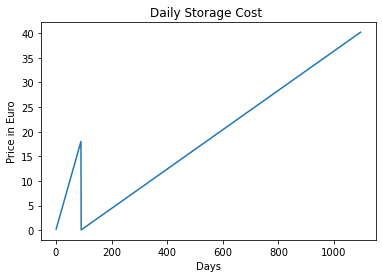

In [8]:
#repeat b for d: Calculate and visualize the daily storage costs for three years for Google big query active logical storage
plt.plot(no_of_days, daily_total_cost_updated)
plt.title("Daily Storage Cost ")
plt.xlabel("Days")
plt.ylabel("Price in Euro")
plt.show()

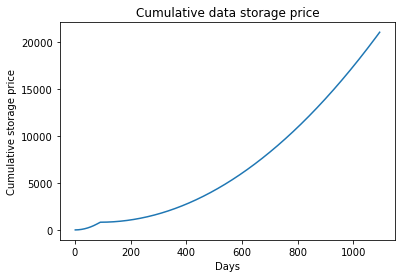

In [9]:
#repeat c for d: Calculate and visualize cumulative storage costs for three years for Google big query storage
plt.plot(no_of_days, daily_cumulative_cost_updated)
plt.title("Cumulative data storage price")
plt.xlabel("Days")
plt.ylabel("Cumulative storage price")
plt.show()

2. Dataset cars_for_exercise.csv contains the basic information about cars registered in Finland in 2020.
    a. Clean the data using Python or OpenRefine.
    b. Describe the errors you found and how you fixed them (if possible)
    c. Use your clean data and visualize the following using Python and matplotlib.pyplot
        - Number of registered vehicles per day in 2020 (line plot)
        - The histogram of the engine volumes
        - The histogram of the number of cylinders

In [10]:
#read csv file and set first column as index
df = pd.read_csv('cars_for_exercise.csv', index_col=0)
#lets see frist fow rows of the dataset
df.head()

,VehicleClass,RegDate,EngineVolume,Cylindars,Brand,Transmission,Year
0,M1,2020-11-27,770.0,NaN,Fiat,1,2020.0
1,M1,2020-02-28,2310.0,5.0,Volvo,1,2020.0
2,M1,2020-12-31,4080.0,NaN,Cadillac,2,2020.0
3,M1,2020-09-07,2316.0,4.0,Volvo,2,2020.0
4,M1,2020-07-03,5359.0,8.0,Chevrolet,2,2020.0


In [11]:
#lets see the info of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124819 entries, 0 to 124818
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   VehicleClass  124819 non-null  object 
 1   RegDate       124819 non-null  object 
 2   EngineVolume  119780 non-null  float64
 3   Cylindars     119398 non-null  float64
 4   Brand         124819 non-null  object 
 5   Transmission  124143 non-null  object 
 6   Year          124819 non-null  float64
dtypes: float64(3), object(4)
memory usage: 7.6+ MB


In [12]:
#lets find duplicate data
df[df.duplicated()].sort_values(by = ['RegDate', 'EngineVolume', 'Brand'],ascending = [True, True, True])  
# there are 86144 Duplicate values across all coulumn, which is 86144/124819 = 69% of the total data.
# it is possible that same multiple car of same model can be registered in a day
# if we could have more information (e.g chassis number) we could then say what are the actual duplicate values
# Now as the amount of duplication is very high we are not going to delete the duplicate valaues

,VehicleClass,RegDate,EngineVolume,Cylindars,Brand,Transmission,Year
1578,M1,2020-01-02,998.0,3.0,Ford,2,2020.0
5590,M1,2020-01-02,998.0,3.0,Ford,2,2020.0
9963,M1,2020-01-02,998.0,3.0,Ford,2,2020.0
15253,M1,2020-01-02,998.0,3.0,Ford,2,2020.0
14805,M1,2020-01-02,998.0,3.0,Hyundai,1,2020.0
...,...,...,...,...,...,...,...
124174,M1,2020-12-31,NaN,NaN,Volvo,Y,2020.0
124340,M1,2020-12-31,NaN,NaN,Volvo,Y,2020.0
124341,M1,2020-12-31,NaN,NaN,Volvo,Y,2020.0
124342,M1,2020-12-31,NaN,NaN,Volvo,Y,2020.0


In [13]:
# lets investigate 'VehicleClass' column
df['VehicleClass'].value_counts() # VehicleClass only have M1 value
df['VehicleClass'].isna().value_counts() #'VehicleClass' has no missing value

False    124819
Name: VehicleClass, dtype: int64

In [14]:
# lets investigate 'RegDate' column

# RegDate should be date type. lets convert the 'RegDate' column to datetime format
df['RegDate']= pd.to_datetime(df['RegDate'],
#attempt to infer date format of each date
infer_datetime_format = True,
#retun NA for rows where conversion failed
errors = 'coerce')

#lets find the missing value and unusual data
df['RegDate'].isnull().sum() # there is no null values
df['RegDate'].isna().value_counts() #'RegDate' has no missing value
df['RegDate'].sort_values() # seems like the 'RegDate' has future year values and in the dataset there should be no year except year 2020

#lets seperate year, month and date from RegDate
df['Year_form_RegDate'] = pd.DatetimeIndex(df['RegDate']).year
df['Month_form_RegDate'] = pd.DatetimeIndex(df['RegDate']).month
df['Day_form_RegDate'] = pd.DatetimeIndex(df['RegDate']).day

#lets see how many rows are there except year 2020
future_year = df['Year_form_RegDate'] != 2020
df[future_year].size # There are 216 rows that are not from 2020. We can either delete those or replace the year with 2020

#lets replace all the year with 2020
df['Year_form_RegDate'] = 2020

# Now construct new 'RegDate'
cols = ['Year_form_RegDate', 'Month_form_RegDate', 'Day_form_RegDate']
df['RegDate'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

# chage the date format to datetime again
df['RegDate']= pd.to_datetime(df['RegDate'],
#attempt to infer date format of each date
infer_datetime_format = True,
#retun NA for rows where conversion failed
errors = 'coerce')

#Finally delete the Year_form_RegDate, Month_form_RegDate, Day_form_RegDate, NewRegDate columns form the dataframe
df.drop(['Year_form_RegDate', 'Month_form_RegDate', 'Day_form_RegDate'], axis=1, inplace=True)


In [15]:
# lets investigate 'EngineVolume' column

df['EngineVolume'].isnull().sum() # there are 5039 NaN values in the; it is normal because electric cars has no cylindar and engine volume. 
df['EngineVolume'].min() # it is unusual that a car has enginevolume less than 80 
df['EngineVolume'].max() # it is unusual that a car has enginevolume 1353000

# A car must not have engine volume if it has no cylindar
eng_vol_without_cylin = df.loc[(df['EngineVolume'].notnull()) & (df['Cylindars'].isnull())] # 385 rows with no Cylindars but has EngineVolume
eng_vol_without_cylin

#lets make engine volume zero of the cars that does not have cylindar
df.loc[(df['EngineVolume'].notnull()) & (df['Cylindars'].isnull()), 'EngineVolume'] = np.nan

#lets find out how many rows has EngineVolume less than 10, which is not real for a car
unusual_EngineVolume = df['EngineVolume'] < 10
unusual_EngineVolume.sum() #there are 32 rows of EngineVolume < 10
# by seeing the values we could say that this might happen due to values unit mismatch of the engine volume.
# where L unit is there instead of CC
#lets multiply the EngineVolume < 10 value by 1000 and convert to CC
df.loc[df['EngineVolume'] < 10 , 'EngineVolume' ] = df['EngineVolume'].multiply(1000)
df.head()
#lets find out how many rows has EngineVolume larger than 15000
unusual_EngineVolume = df['EngineVolume'] > 15000
unusual_EngineVolume.sum() # #there are 16 rows where EngineVolume > 15000
df[unusual_EngineVolume] # car brands are Kia with 4 Cylindar, Ford with 3 Cylindar and  Toyota 4 cylindar has unusal higher engine volume.

,VehicleClass,RegDate,EngineVolume,Cylindars,Brand,Transmission,Year
15077,M1,2020-01-24,1353000.0,4.0,Kia,2,2020.0
15078,M1,2020-07-23,1353000.0,4.0,Kia,2,2020.0
15079,M1,2020-08-07,1353000.0,4.0,Kia,2,2020.0
15080,M1,2020-07-13,1353000.0,4.0,Kia,2,2020.0
15081,M1,2020-04-30,1353000.0,4.0,Kia,2,2020.0
15082,M1,2020-07-31,1353000.0,4.0,Kia,2,2020.0
75462,M1,2020-10-12,999000.0,3.0,Ford,1,2020.0
75463,M1,2020-08-12,999000.0,3.0,Ford,1,2020.0
75464,M1,2020-10-30,999000.0,3.0,Ford,1,2020.0
75465,M1,2020-08-05,999000.0,3.0,Ford,1,2020.0


In [16]:
# Now we will impute the unusal engine volume with the mean value of the engine volume of same brand with same cylindar number
# lets construct new data frame with only ususal engine volume
df_new = df[~unusual_EngineVolume]
df_new
# lets find out what is the avg engine volume of a Kia, ford and toyota brand car with 4, 3 ,4 cylindars respectively
kia_four = df_new.loc[(df_new['Cylindars'] == 4.0) & (df_new['Brand'] == 'Kia')]
kia_four_mean = kia_four['EngineVolume'].mean() # average EngineVolume of KIA with 4 cylindats is 1508.97

ford_three = df_new.loc[(df_new['Cylindars'] == 3.0) & (df_new['Brand'] == 'Ford')] ## Check again
ford_three_mean = ford_three['EngineVolume'].mean() # average EngineVolume of Ford with 3 cylindats is 1071.49

toyota_four = df_new.loc[(df_new['Cylindars'] == 4.0) & (df_new['Brand'] == 'Toyota')]
toyota_four_mean = toyota_four['EngineVolume'].mean() # average EngineVolume of Ford with 3 cylindats is 1883.30

# lets replace the EngineVolumes > 15000 with an average Engine volume value of the same brand and cylindar 
df.loc[(df['EngineVolume'] > 15000) & (df['Brand'] == 'Kia'), 'EngineVolume'] = kia_four_mean
df.loc[(df['EngineVolume'] > 15000) & (df['Brand'] == 'Ford'), 'EngineVolume'] = ford_three_mean
df.loc[(df['EngineVolume'] > 15000) & (df['Brand'] == 'Toyota'), 'EngineVolume'] = toyota_four_mean

# A car must not have cylindar if it has no EngineVulume
cylin_without_eng_vol = df.loc[(df['EngineVolume'].isnull()) & (df['Cylindars'].notnull())] # 3 rows with no EngineVolume but has cylindar
cylin_without_eng_vol # one Mercedes-Benz with 4, Mitsubishi with 4, Audi with 6 Cylindars has no EngineVolume

# lets find out what is the avg engine volume of a Mercedes-Benz, Mitsubishi and Audi brand car with 4, 4 ,6 cylindars respectively and impute
# that vaule in missing EngineVulume
mercedes_four = df_new.loc[(df_new['Cylindars'] == 4.0) & (df_new['Brand'] == 'Mercedes-Benz')]
mercedes_four_mean = mercedes_four ['EngineVolume'].mean() # average EngineVolume of Mercedes-Benz with 4 cylindats is 1879.41

mitsubishi_four = df_new.loc[(df_new['Cylindars'] == 4.0) & (df_new['Brand'] == 'Mitsubishi')]
mitsubishi_four_mean = mitsubishi_four ['EngineVolume'].mean() # average EngineVolume of Mitsubishi with 4 cylindats is 2055.87

audi_four = df_new.loc[(df_new['Cylindars'] == 6.0) & (df_new['Brand'] == 'Audi')]
audi_four_mean = audi_four ['EngineVolume'].mean() # average EngineVolume of Audi with 6 cylindats is 2960.70

# lets replace the missing EngineVolumes with an average Engine volume value of the same brand and cylindar 
df.loc[(df['EngineVolume'].isnull()) & (df['Cylindars'].notnull()) & (df_new['Brand'] == 'Mercedes-Benz'), 'EngineVolume'] = mercedes_four_mean
df.loc[(df['EngineVolume'].isnull()) & (df['Cylindars'].notnull()) & (df_new['Brand'] == 'Mitsubishi'), 'EngineVolume'] = mitsubishi_four_mean
df.loc[(df['EngineVolume'].isnull()) & (df['Cylindars'].notnull()) & (df_new['Brand'] == 'Audi'), 'EngineVolume'] = audi_four_mean

df.head()

,VehicleClass,RegDate,EngineVolume,Cylindars,Brand,Transmission,Year
0,M1,2020-11-27,NaN,NaN,Fiat,1,2020.0
1,M1,2020-02-28,2310.0,5.0,Volvo,1,2020.0
2,M1,2020-12-31,NaN,NaN,Cadillac,2,2020.0
3,M1,2020-09-07,2316.0,4.0,Volvo,2,2020.0
4,M1,2020-07-03,5359.0,8.0,Chevrolet,2,2020.0


In [17]:
# lets investigate 'Cylindars' column
df['Cylindars'].isnull().sum() # there are 5421 NaN values in the; electric cars has no cylindar. 

df['Cylindars'].min() # a car can have as low as 1 cylindar 
df['Cylindars'].max() # it is unusual that a car has more than 12 cylindar

#lets find how many cars has cylindars more than 12

df[df['Cylindars'] > 12].shape[0] #There are 30 cars that has cylindars more than 12
# These 30 cars are very low amount of data compared to total database (30/124819 = 0.024 %) so we can easily delete those.
df.drop(df[df['Cylindars'] > 12].index, inplace=True)
#reset index
df = df.reset_index(drop=True)

In [18]:
# lets investigate 'Brand' column
#lets remove any leading spaces and trailing spaces at the end and convert all character in lower case
df['Brand'] = df['Brand'].str.strip()
df['Brand'] = df['Brand'].str.lower()
df['Brand'].isnull().sum() # there are 0 Missing values in the Brand column.
df['Brand'].nunique() # there are 177 Unique car Brands
df['Brand'].value_counts()

toyota            15207
mercedes-benz     13770
volkswagen, vw    12645
skoda             10476
volvo             10367
                  ...  
kaiser                1
vaz                   1
lamborghini           1
cuby                  1
iveco-concorde        1
Name: Brand, Length: 177, dtype: int64

In [19]:
# lets find out few brands name mismatch in the coulmn
df[df['Brand'].str.contains('mercedes*')]['Brand'].value_counts() #mercedes-benz, mercedes-amg, mercedes-benz-burstner, mercedes benz-dethleffs 
df[df['Brand'].str.contains('tesla*')]['Brand'].value_counts() #tesla, tesla motors
df[df['Brand'].str.contains('volkswagen*')]['Brand'].value_counts() #volkswagen, vw, volkswagen, volkswagen-karmann

# if we had a database with correct name of car brands name we could compare stings and clean the Brand name column.
#now lets keep it as it is as it has no impact on visualizing,
# Number of registered vehicles per day in 2020 (line plot)
# The histogram of the engine volumes
# The histogram of the number of cylinders

volkswagen, vw        12645
volkswagen             1202
volkswagen-karmann        1
Name: Brand, dtype: int64

In [20]:
# lets investigate 'Transmission' column
df['Transmission'].isnull().sum() # there are 676 missing values in the tansmission column.
df['Transmission'].value_counts() # Transmission has both number in alphabate types

2    77639
1    23255
3    17769
Y     4648
X      786
4       12
5        3
7        1
Name: Transmission, dtype: int64

In [21]:
# lets investigate 'Year' column
df['Year'].isnull().sum() # there are no missing values in the year column.
df['Year'].value_counts() # only 2020 value is available
#lets convert the value type to int
df['Year'] = df['Year'].astype(int)

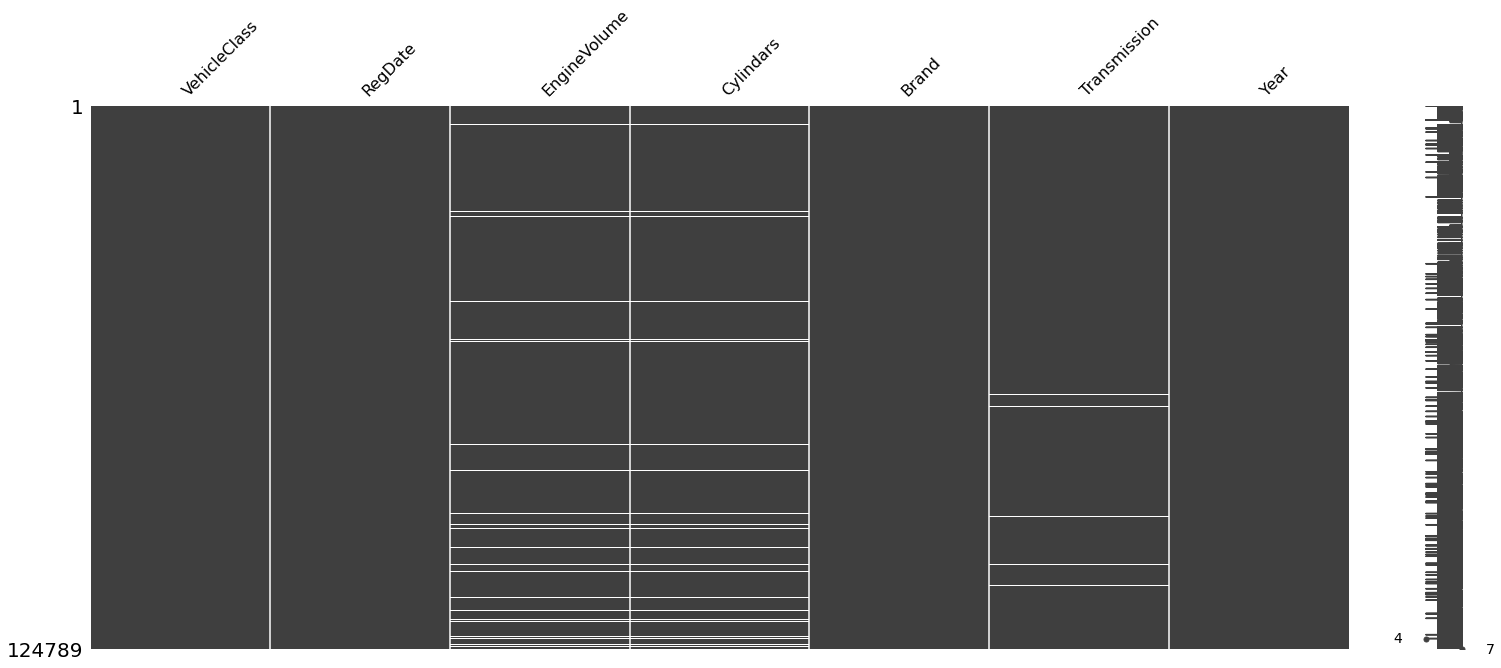

In [22]:
#lets visualize the missing value of all column
msno.matrix(df)
plt.show()

c. Use your clean data and visualize the following using Python and matplotlib.pyplot
        - Number of registered vehicles per day in 2020 (line plot)
        - The histogram of the engine volumes
        - The histogram of the number of cylinders

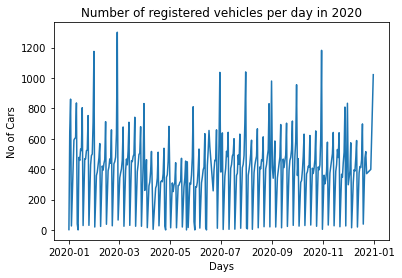

In [23]:
# Number of registered vehicles per day in 2020 (line plot)
#df['RegDate'].value_counts().plot()

x = df.groupby('RegDate')['RegDate'].value_counts()
y = df_new['RegDate'].sort_values().unique()
plt.plot (y, x)
plt.title('Number of registered vehicles per day in 2020')
plt.xlabel('Days')
plt.ylabel('No of Cars')
plt.show()

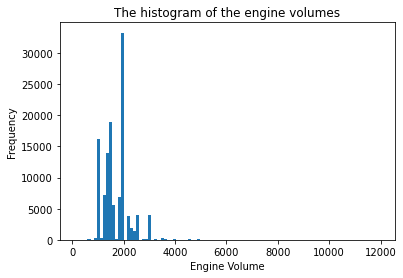

In [24]:
#The histogram of the engine volumes
x = df['EngineVolume']
plt.hist(x, bins=100)
plt.title('The histogram of the engine volumes')
plt.xlabel('Engine Volume')
plt.ylabel('Frequency')
plt.show()

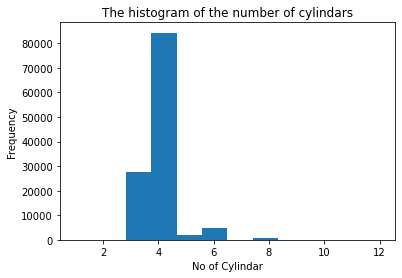

In [25]:
#The histogram of the number of cylindars
x = df['Cylindars']
plt.hist(x, bins =12)
plt.title('The histogram of the number of cylindars')
plt.xlabel('No of Cylindar')
plt.ylabel('Frequency')
plt.show()

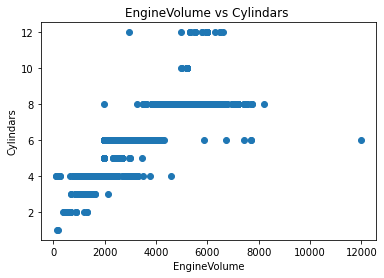

In [26]:
# lets see the relation between Enginevolume with no of Cylindars
plt.scatter(x = 'EngineVolume', y = 'Cylindars', data = df)
plt.title('EngineVolume vs Cylindars ')
plt.xlabel('EngineVolume')
plt.ylabel('Cylindars')
plt.show()

Thank you. I would appreciate if you could give me feedback